In [1]:
#Last week's function
from pylab import *

def dft(func,tim= None,n_p=512,fig_no=0,name= None):
    '''Function to plot the dft using fft algorithm
func: lambda/function whose fourier transform is required
time: time interval in the form (start_time,end_time)
default is (-4*pi,4*pi)
n_p: number of samples in time domain
fig_no: Figure number
name: Name of function for the graph
'''
    if tim is None:
        t=linspace(-4*pi,4*pi,n_p,endpoint= False)
    else:
        start,end = tim
        t = linspace(start,end,n_p,endpoint=False)
    y = func(t)
    y[0]=0# the sample corresponding to -tmax should be set zeroo
    Y=fftshift(fft(fftshift(y)))/n_p#fftshift so the plot is in terms we know
    w=linspace(-pi,pi,n_p,endpoint= False);
    w = w*n_p/(end-start)#the range of frequencies
    fig, (ax1, ax2) = plt.subplots(2, 1)

    Ysig = where(abs(Y)>10**-5)#only plot significant points phase
    ax1.plot(w,abs(Y),lw=1)
    #to ensure that we dont go too far on each side

    ax1.set_ylabel(r"$|Y|$",size=16)
    ax1.grid(True)
    ax2.plot(w[Ysig],angle(Y[Ysig]),'ro')

    ax2.set_ylabel(r"Phase of $Y$",size=16)
    ax2.set_xlabel(r"$\omega$",size=16)
    grid(True)
    title("Spectrum of {}".format(name))

    return ax1,ax2,Y

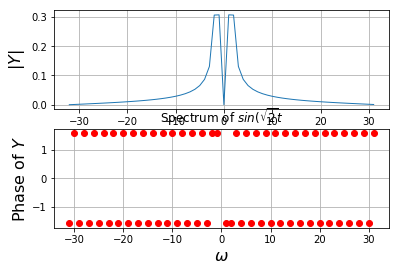

In [2]:
y1 = lambda t: sin(sqrt(2)*t)
dft(y1,(-pi,pi),64,1,r'$sin(\sqrt{2}t$')
show()

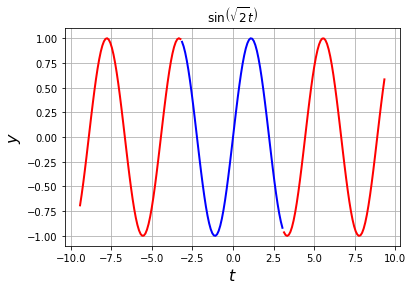

In [3]:
t1=linspace(-pi,pi,65);t1=t1[:-1]
t2=linspace(-3*pi,-pi,65);t2=t2[:-1]
t3=linspace(pi,3*pi,65);t3=t3[:-1]
# y=sin(sqrt(2)*t)
figure(2)
plot(t1,sin(sqrt(2)*t1),'b',lw=2)
plot(t2,sin(sqrt(2)*t2),'r',lw=2)
plot(t3,sin(sqrt(2)*t3),'r',lw=2)
ylabel(r"$y$",size=16)
xlabel(r"$t$",size=16)
title(r"$\sin\left(\sqrt{2}t\right)$")
grid(True)
savefig("fig10-2.png")
show()

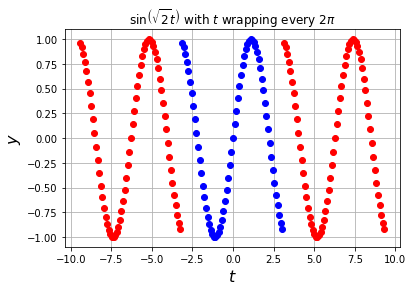

In [4]:
from pylab import *
t1=linspace(-pi,pi,65);t1=t1[:-1]
t2=linspace(-3*pi,-pi,65);t2=t2[:-1]
t3=linspace(pi,3*pi,65);t3=t3[:-1]
y=sin(sqrt(2)*t1)
figure(3)
plot(t1,y,'bo',lw=2)
plot(t2,y,'ro',lw=2)
plot(t3,y,'ro',lw=2)
ylabel(r"$y$",size=16)
xlabel(r"$t$",size=16)
title(r"$\sin\left(\sqrt{2}t\right)$ with $t$ wrapping every $2\pi$ ")
grid(True)
show()

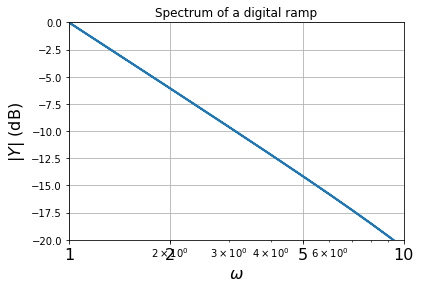

In [5]:
from pylab import *
t=linspace(-pi,pi,65);t=t[:-1]
dt=t[1]-t[0];fmax=1/dt
y=t
y[0]=0 # the sample corresponding to -tmax should be set zeroo
y=fftshift(y) # make y start with y(t=0)
Y=fftshift(fft(y))/64.0
w=linspace(-pi*fmax,pi*fmax,65);w=w[:-1]
figure()
semilogx(abs(w),20*log10(abs(Y)),lw=2)
xlim([1,10])
ylim([-20,0])
xticks([1,2,5,10],["1","2","5","10"],size=16)
ylabel(r"$|Y|$ (dB)",size=16)
title(r"Spectrum of a digital ramp")
xlabel(r"$\omega$",size=16)
grid(True)
show()

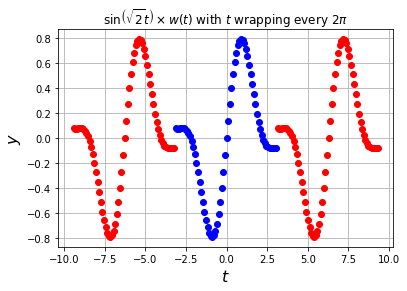

In [6]:
wnd= lambda t: fftshift(0.54+0.46*cos(2*pi*t/len(t)))
y1 = lambda t: sin(sqrt(2)*t)*wnd(t)
t1=linspace(-pi,pi,65);t1=t1[:-1]
t2=linspace(-3*pi,-pi,65);t2=t2[:-1]
t3=linspace(pi,3*pi,65);t3=t3[:-1]
n = arange(64)
y=sin(sqrt(2)*t1)*wnd(n)
figure(3)
plot(t1,y,'bo',lw=2)
plot(t2,y,'ro',lw=2)
plot(t3,y,'ro',lw=2)
ylabel(r"$y$",size=16)
xlabel(r"$t$",size=16)
title(r"$\sin\left(\sqrt{2}t\right)\times w(t)$ with $t$ wrapping every $2\pi$ ")
grid(True)
savefig("fig10-5.png")
show()

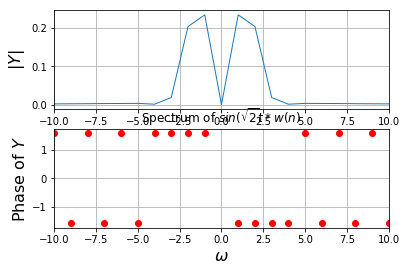

In [7]:
y2 = lambda t,n: y1(t)*wnd(arange(n))
y264 = lambda t: y2(t,64)
ax1,ax2,w = dft(y264,(-pi,pi),64,1,r'$sin(\sqrt{2}t*w(n)$')
ax1.set_xlim(-10,10)
ax2.set_xlim(-10,10)
show()

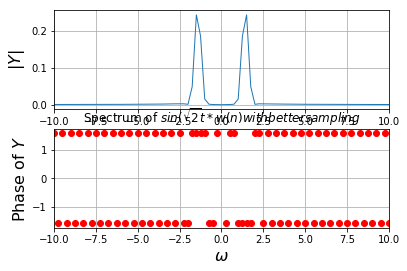

In [8]:
y2256 = lambda t: y2(t,256)
ax1,ax2,w = dft(y2256,(-4*pi,4*pi),256,1,r'$sin(\sqrt{2}t*w(n) with better sampling$')
ax1.set_xlim(-10,10)
ax2.set_xlim(-10,10)

show()

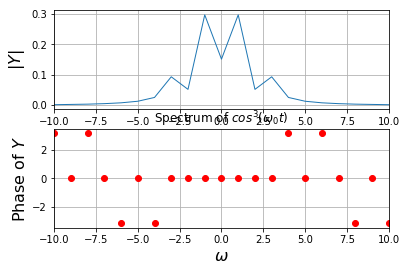

In [9]:
y3 = lambda t:(cos(0.86*t))**3
ax1,ax2,w = dft(y3,(-pi,pi),256,1,r'$cos^{3}(\omega_{0}t)$')
ax1.set_xlim(-10,10)
ax2.set_xlim(-10,10)
show()

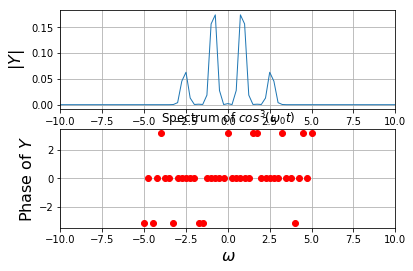

In [10]:
y4 = lambda t,n: y3(t)*wnd(arange(n))
y464 = lambda t: y4(t,256)

ax1,ax2,w = dft(y464,(-4*pi,4*pi),256,1,r'$cos^{3}(\omega_{0}t)$')
ax1.set_xlim(-10,10)
ax2.set_xlim(-10,10)
show()

1.2214619719196165
0.7574596213758671


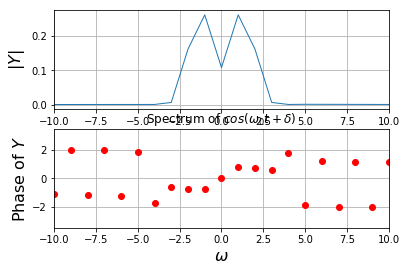

In [11]:
def cosest(w,d):
    fn1 = lambda t:  cos(w*t+d)*wnd(arange(len(t)))
    ax1,ax2,Y = dft(fn1,(-pi,pi),128,1,r'$cos(\omega_{0}t+\delta)$')
    ax1.set_xlim(-10,10)
    ax2.set_xlim(-10,10)
    
    print(sum(abs((Y*abs(arange(len(Y))-len(Y)//2)))[64:64+10])/sum(abs(Y)[64:64+5]))
    print(angle(Y[len(Y)//2+1]))
    return(Y)

Yf = cosest(1.21,0.75)

1.1907263243115496
0.7208392715344307


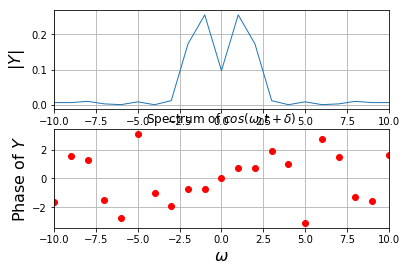

In [14]:
def cosest(w,d):
    fn1 = lambda t:  cos(w*t+d)*wnd(arange(len(t))) +0.1*randn(len(t))
    ax1,ax2,Y = dft(fn1,(-pi,pi),128,1,r'$cos(\omega_{0}t+\delta)$')
    ax1.set_xlim(-10,10)
    ax2.set_xlim(-10,10)
    
    print(sum(abs((Y*abs(arange(len(Y))-len(Y)//2)))[64:64+5])/sum(abs(Y)[64:64+5]))
    print((angle(Y[len(Y)//2+1])))
    return(Y)

Yf = cosest(1.21,0.75)

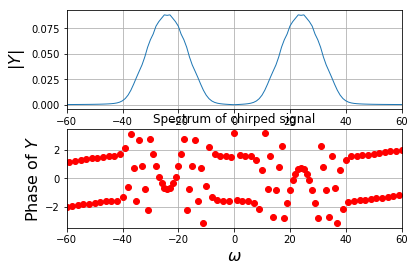

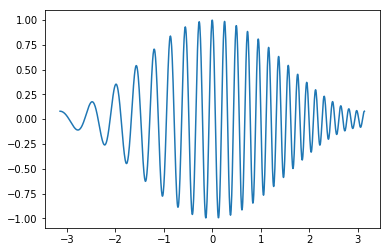

In [13]:
ychirp = lambda t: cos(16*t*(1.5+t/(2*pi)))*wnd(arange(len(t)))
ax1,ax2,Ychirp = dft(ychirp,(-pi,pi),1024,1,r'chirped signal')
ax1.set_xlim(-60,60)
ax2.set_xlim(-60,60)
figure(2)
t = linspace(-pi,pi,1024)
plot(t,ychirp(t))
show()

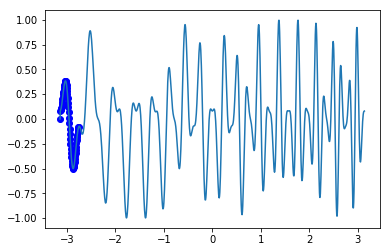

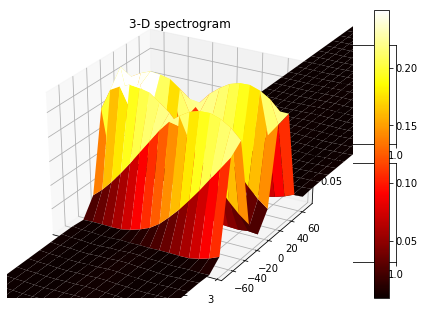

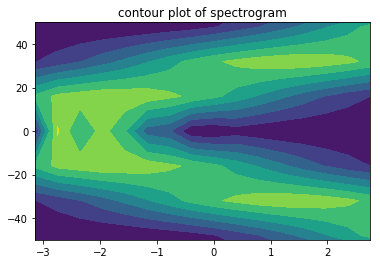

In [56]:
import mpl_toolkits.mplot3d.axes3d as p3
def dftchirp(func,n_p=512,fig_no=0,name= None):
    '''Function to plot the dft for the chirped signal using fft algorithm
func: lambda/function whose fourier transform is required
time: time interval in the form (start_time,end_time)
default is (-4*pi,4*pi)
n_p: number of samples in time domain
fig_no: Figure number
name: Name of function for the graph 
'''
    Y=fftshift(fft(ifftshift(func),n=64) )/n_p#fftshift so the plot is in terms we know
    w=linspace(-pi,pi,64,endpoint= False);
    w = w*n_p*16/(2*pi)#the range of frequencies
    fig, (ax1, ax2) = plt.subplots(2, 1)

    fig2=plt.figure(2)
    ax=p3.Axes3D(fig2) 
    title('3-D spectrogram')
    X = linspace(-pi,pi,16,endpoint=False)
    w,X =  meshgrid(w,X)
    surf = ax.plot_surface(X, w, abs(Y), rstride=1, cstride=1, cmap=matplotlib.cm.hot,linewidth=0)
    fig2.colorbar(surf)
    ax.set_ylim(-75,75)
    show()
    c = contourf(X,w,abs(Y))
    ylim(-50,50)
    title("contour plot of spectrogram")
    show()
    return ax1,ax2,Y

t = linspace(-pi,pi,1024,endpoint=False)
yorg = cos(16*t*(1.5+t/(2*pi)))*tile(wnd(arange(64)),16)
yorg[0]=0 #the sample corresponding to -tmax should be set zero
y = asarray(split(yorg,16))
plot(t[0:64],y[0],'bo')
plot(t,yorg)

ax1,ax2,Y = dftchirp(y,64,1,r'chirped signal')

ax1.set_xlim(-50,50)
ax2.set_xlim(-50,50)
show()